In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas.tseries.offsets import *
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import randint
import time
import warnings

In [80]:
df = pd.read_csv('DataExtract_v2.csv') #read in CSV file provided

C:\Users\rmead\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
df.columns

Index(['MyDealId', 'SfdcDealId', 'OpportunityNumber', 'BookingSystemName',
       'Assets', 'IsPrimary', 'segmentvalue', 'OpportunityTypeValue', 'DealId',
       'SFDCSUPPORTREQUESTID', 'CustomerNumber', 'dealstatusvalue',
       'RegionValue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',
       'Fiscal Year', 'Fiscal Quarter', 'Fiscal Week', 'IntakeDate',
       'AssignedDate', 'FirstDeliverableProvidedDate',
       'FinalDeliverableProvidedDate', 'ContractDecisionDate',
       'EstimatedAwardDate', 'EstimatedDeliveryDate', 'RespondedToSales',
       'SfdcDeliverableDueDate', 'ContractRevenue', 'LineItemRevenue',
       'dealtechnologytags'],
      dtype='object')

In [82]:
df = df[df['RegionValue'] == "AMER"]

In [83]:
df = df.drop(columns=['SfdcDealId','DealId','SFDCSUPPORTREQUESTID','OpportunityNumber','segmentvalue','ContractDecisionDate',
       'EstimatedAwardDate', 'EstimatedDeliveryDate','SfdcDeliverableDueDate'])

In [84]:
df = df[df['dealstatusvalue'] != 'Lost']

In [85]:
df = df[df['dealstatusvalue'] != 'Cancelled']

In [86]:
df = df[df['dealstatusvalue'] != 'No Opportunity']

In [87]:
df = df[df['dealstatusvalue'] != 'Inactive']

In [88]:
df = df[df['dealstatusvalue'] != 'Solutioning']

In [89]:
df['dealstatusvalue'].value_counts()

Won                     5214
Deliverable Provided    3219
Name: dealstatusvalue, dtype: int64

In [90]:
df['CountryValue'].value_counts()

United States    7782
Canada            653
Name: CountryValue, dtype: int64

In [91]:
sum(df['OwnerID'].isnull())

0

In [92]:
sum(df['TechnologySolutionOwnerBadge'].isnull())

128

In [93]:
sum(df['SMEID'].isnull())

2303

In [94]:
sum(df['AssignedDate'].isnull())

6

In [95]:
sum(df['FirstDeliverableProvidedDate'].isnull())

52

In [96]:
df[df['FirstDeliverableProvidedDate'].isnull()]

,MyDealId,BookingSystemName,Assets,IsPrimary,OpportunityTypeValue,CustomerNumber,dealstatusvalue,RegionValue,CountryValue,OwnerID,...,Fiscal Quarter,Fiscal Week,IntakeDate,AssignedDate,FirstDeliverableProvidedDate,FinalDeliverableProvidedDate,RespondedToSales,ContractRevenue,LineItemRevenue,dealtechnologytags
47,432918,NaN,0.0,1,Custom,NaN,Won,AMER,United States,672149.0,...,2019Q01,201906,3/15/18 1:52 PM,3/15/18 4:44 PM,NaN,NaN,NaN,NaN,NaN,NaN
50,432933,NaN,0.0,1,Custom,NaN,Deliverable Provided,AMER,United States,1083192.0,...,2019Q01,201906,3/15/18 1:56 PM,3/15/18 6:48 PM,NaN,NaN,NaN,NaN,NaN,NaN
474,446211,NaN,0.0,1,Custom,NaN,Deliverable Provided,AMER,United States,1083192.0,...,2019Q02,201926,8/2/18 2:31 PM,8/8/18 1:14 AM,NaN,NaN,NaN,NaN,NaN,NaN
2939,434877,NaN,0.0,0,Custom,NaN,Deliverable Provided,AMER,United States,1083192.0,...,2019Q01,201909,4/2/18 9:24 PM,4/3/18 9:46 PM,NaN,NaN,NaN,NaN,0.00,NaN
2940,434877,NaN,0.0,1,Custom,NaN,Deliverable Provided,AMER,United States,1083192.0,...,2019Q01,201909,4/2/18 9:24 PM,4/3/18 9:46 PM,NaN,NaN,NaN,NaN,NaN,NaN
3997,431895,NaN,0.0,1,Custom,NaN,Won,AMER,United States,389841.0,...,2019Q01,201905,3/9/18 2:27 PM,3/9/18 2:28 PM,NaN,NaN,NaN,NaN,NaN,NaN
4290,431218,NaN,0.0,1,Custom,NaN,Won,AMER,United States,389841.0,...,2019Q01,201904,3/1/18 7:05 PM,3/1/18 7:07 PM,NaN,NaN,NaN,NaN,NaN,NaN
5280,431129,NaN,0.0,1,Custom,NaN,Won,AMER,United States,672149.0,...,2019Q01,201904,2/28/18 2:17 PM,2/28/18 7:44 PM,NaN,NaN,NaN,NaN,NaN,NaN
6602,433460,NaN,0.0,1,Custom,NaN,Won,AMER,United States,672149.0,...,2019Q01,201907,3/20/18 4:11 PM,3/20/18 8:31 PM,NaN,NaN,NaN,NaN,NaN,NaN
6902,450709,NaN,7.0,1,Custom APOS,NaN,Won,AMER,United States,793683.0,...,2019Q03,201935,10/4/18 7:29 PM,10/4/18 7:31 PM,NaN,NaN,NaN,1628.16,1628.16,NaN


In [97]:
sum(df['FinalDeliverableProvidedDate'].isnull())

4898

In [98]:
sum(df['ContractRevenue'].isnull())

476

In [99]:
sum(df['LineItemRevenue'].isnull())

359

In [100]:
sum(df['dealtechnologytags'].isnull())

5393

In [101]:
len(df)

8435

In [102]:
df.head()

,MyDealId,BookingSystemName,Assets,IsPrimary,OpportunityTypeValue,CustomerNumber,dealstatusvalue,RegionValue,CountryValue,OwnerID,...,Fiscal Quarter,Fiscal Week,IntakeDate,AssignedDate,FirstDeliverableProvidedDate,FinalDeliverableProvidedDate,RespondedToSales,ContractRevenue,LineItemRevenue,dealtechnologytags
11,443840,NaN,NaN,1,Custom POS,NaN,Won,AMER,United States,268135.0,...,2019Q01,201901,2/7/18 6:00 AM,2/7/18 6:00 AM,2/12/18 6:00 AM,2/12/18 6:00 AM,NaN,1295.00,1295.00,NaN
12,443845,NaN,NaN,0,Custom POS,NaN,Deliverable Provided,AMER,United States,268135.0,...,2019Q01,201901,2/7/18 6:00 AM,2/7/18 6:00 AM,2/12/18 6:00 AM,2/12/18 6:00 AM,NaN,263060.26,7964.80,NaN
13,443845,NaN,NaN,1,Custom POS,NaN,Deliverable Provided,AMER,United States,268135.0,...,2019Q01,201901,2/7/18 6:00 AM,2/7/18 6:00 AM,2/12/18 6:00 AM,2/12/18 6:00 AM,NaN,263060.26,255095.46,NaN
16,429207,NaN,0.0,1,Custom APOS,NaN,Won,AMER,United States,1294176.0,...,2019Q01,201901,2/7/18 6:06 PM,2/7/18 6:06 PM,2/7/18 6:08 PM,NaN,NaN,594.00,594.00,NaN
32,429310,NaN,9.0,1,Custom APOS,NaN,Won,AMER,United States,1283890.0,...,2019Q01,201901,2/8/18 6:38 PM,2/8/18 6:41 PM,2/8/18 6:42 PM,NaN,NaN,9849.46,9849.46,NaN


In [103]:
df = df.drop(columns = 'RegionValue')

In [104]:
df = df.drop_duplicates()

In [105]:
df.columns

Index(['MyDealId', 'BookingSystemName', 'Assets', 'IsPrimary',
       'OpportunityTypeValue', 'CustomerNumber', 'dealstatusvalue',
       'CountryValue', 'OwnerID', 'TechnologySolutionOwnerBadge', 'SMEID',
       'LOBNAME', 'Technologyname', 'Fiscal Year', 'Fiscal Quarter',
       'Fiscal Week', 'IntakeDate', 'AssignedDate',
       'FirstDeliverableProvidedDate', 'FinalDeliverableProvidedDate',
       'RespondedToSales', 'ContractRevenue', 'LineItemRevenue',
       'dealtechnologytags'],
      dtype='object')

In [106]:
df_numeric = df[['MyDealId','Assets','IsPrimary','CustomerNumber','OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'IntakeDate', 'Fiscal Week',
       'AssignedDate', 'FirstDeliverableProvidedDate',
       'FinalDeliverableProvidedDate', 'RespondedToSales', 'ContractRevenue','LineItemRevenue']]
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,MyDealId,Assets,IsPrimary,OwnerID,TechnologySolutionOwnerBadge,SMEID,Fiscal Week,ContractRevenue,LineItemRevenue
MyDealId,1,0.12597,0.017221,0.0781931,0.105112,0.0827443,0.962156,0.0357532,0.0268599
Assets,0.12597,1,-0.00480994,-0.132155,-0.131199,-0.0475735,0.134018,0.0874238,0.163301
IsPrimary,0.017221,-0.00480994,1,0.149906,0.136235,-0.0295234,0.0485874,-0.174115,-0.0284594
OwnerID,0.0781931,-0.132155,0.149906,1,0.988419,0.871642,0.0805652,0.0123595,-0.001289
TechnologySolutionOwnerBadge,0.105112,-0.131199,0.136235,0.988419,1,0.876441,0.105967,0.0335379,0.0134842
SMEID,0.0827443,-0.0475735,-0.0295234,0.871642,0.876441,1,0.0729873,0.0592858,0.0292449
Fiscal Week,0.962156,0.134018,0.0485874,0.0805652,0.105967,0.0729873,1,0.00917885,0.00926105
ContractRevenue,0.0357532,0.0874238,-0.174115,0.0123595,0.0335379,0.0592858,0.00917885,1,0.663556
LineItemRevenue,0.0268599,0.163301,-0.0284594,-0.001289,0.0134842,0.0292449,0.00926105,0.663556,1


In [107]:
#df.to_csv('dellcapstone_cleaned_v1.csv')

In [108]:
df['AssignedDate'] = pd.to_datetime(df['AssignedDate'])

In [109]:
df['IntakeDate'] = pd.to_datetime(df['IntakeDate'])
df['FinalDeliverableProvidedDate'] = pd.to_datetime(df['FinalDeliverableProvidedDate'])
df['FirstDeliverableProvidedDate'] = pd.to_datetime(df['FirstDeliverableProvidedDate'])
df['RespondedToSales'] = pd.to_datetime(df['RespondedToSales'])

In [110]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [111]:
missing_values_table(df)

Your selected dataframe has 24 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
dealtechnologytags,5393,63.9
FinalDeliverableProvidedDate,4898,58.1
CustomerNumber,4592,54.4
RespondedToSales,4504,53.4
BookingSystemName,4503,53.4
Assets,3486,41.3
SMEID,2303,27.3
ContractRevenue,476,5.6
LineItemRevenue,359,4.3
OpportunityTypeValue,319,3.8


#### Action Plan: 
1. Impute any missing First Deliverable Provided Date which have Final Deliverable Provided
2. When we have line item revenue and not contract revenue, impute for contract revenue from line item revenue (?)
    - _*Not sure if this should be the revese since we are missing more ContractRevenue than LineItemRevenue*_
3. Convert SMEID to "Yes" / "No" 1/0 encoding
4. For the 6 rows missing AssignedDate, impute with IntakeDate
6. Impute TechnologySolutionOwnerBadge nulls from OwnerID
5. Drop Responded to Sales, IntakeDate, and Tags for first round of analysis

#### Follow up by: 
1. Look for patterns in OpportunityTypeValue (does CustomerNumber or something indicate this value?)
2. Look for imputation opportunity with Assets and ContractRevenue/LineItemRevenue

#### In analysis: 
1. Test if we can get more reliable predictions using FinalDeliverable instead of FirstDeliverable
2. Test if Tags add info (?)

In [278]:
data = df.copy(deep=True)
data['AssignedDate'] = np.where(data['AssignedDate'].isnull(),data['IntakeDate'],data['AssignedDate'])
data['FirstDeliverableProvidedDate'] = np.where(data['FirstDeliverableProvidedDate'].isnull(),data['FinalDeliverableProvidedDate'],data['FirstDeliverableProvidedDate'])

In [279]:
data = data.drop(columns = ['RespondedToSales','dealtechnologytags','IntakeDate'])

In [280]:
data = data.drop(columns = ['FinalDeliverableProvidedDate'])

In [281]:
data.dropna(axis=0, how='any', subset=['AssignedDate','dealstatusvalue'], inplace=True)

In [282]:
missing_values_table(data)

Your selected dataframe has 20 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
CustomerNumber,4592,54.5
BookingSystemName,4501,53.4
Assets,3486,41.3
SMEID,2301,27.3
ContractRevenue,474,5.6
LineItemRevenue,358,4.2
OpportunityTypeValue,319,3.8
TechnologySolutionOwnerBadge,128,1.5
FirstDeliverableProvidedDate,41,0.5


In [283]:
data.columns

Index(['MyDealId', 'BookingSystemName', 'Assets', 'IsPrimary',
       'OpportunityTypeValue', 'CustomerNumber', 'dealstatusvalue',
       'CountryValue', 'OwnerID', 'TechnologySolutionOwnerBadge', 'SMEID',
       'LOBNAME', 'Technologyname', 'Fiscal Year', 'Fiscal Quarter',
       'Fiscal Week', 'AssignedDate', 'FirstDeliverableProvidedDate',
       'ContractRevenue', 'LineItemRevenue'],
      dtype='object')

In [284]:
data['SMEID'] = np.where(data['SMEID'].isnull(),0,data['SMEID'])
data['SMEID'] = np.where(data['SMEID'] == data['OwnerID'],0,1)

In [285]:
data.dropna(axis=0, how='any', subset=['FirstDeliverableProvidedDate'], inplace=True)

In [286]:
data['TechnologySolutionOwnerBadge'] = np.where(data['TechnologySolutionOwnerBadge'].isnull(),data['OwnerID'],data['TechnologySolutionOwnerBadge'])

In [287]:
data.drop(columns=['Fiscal Year','Fiscal Week','Fiscal Quarter'],inplace=True)

In [288]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
CustomerNumber,4567,54.4
BookingSystemName,4470,53.3
Assets,3481,41.5
ContractRevenue,441,5.3
LineItemRevenue,328,3.9
OpportunityTypeValue,317,3.8


In [289]:
data['AssignedDate'] = pd.to_datetime(data['AssignedDate'])
data['FirstDeliverableProvidedDate'] = pd.to_datetime(data['FirstDeliverableProvidedDate'])
data['y'] = data.apply(lambda x: len(pd.bdate_range(x['AssignedDate'], x['FirstDeliverableProvidedDate'])), axis=1)

In [290]:
data['year'] = data['AssignedDate'].dt.year
data['month'] = data['AssignedDate'].dt.month
data['day'] = data['AssignedDate'].dt.day

In [291]:
data['OpportunityTypeValue'].value_counts()

Custom APOS                   2039
Custom                        1953
Relationship                  1849
Transactional                 1175
Custom POS                     727
Relationship - Complex         155
GeoPartner                      97
Standard                        42
Closed with a Standard SKU      35
Staff Augmentation               2
CSG Acq – Relationship           1
Name: OpportunityTypeValue, dtype: int64

In [292]:
data['OpportunityTypeValue'] = np.where(data['OpportunityTypeValue'].isnull(),'Custom APOS',data['OpportunityTypeValue'])
data['LineItemRevenue'] = np.where(data['LineItemRevenue'].isnull(),data['ContractRevenue'],data['LineItemRevenue'])
data['ContractRevenue'] = np.where(data['ContractRevenue'].isnull(),data['LineItemRevenue'],data['ContractRevenue'])

In [293]:
avg_ctr_rev = data['ContractRevenue'].mean()
avg_line_rev = data['LineItemRevenue'].mean()

In [294]:
data['ContractRevenue'] = np.where(data['ContractRevenue'].isnull(),avg_ctr_rev,data['ContractRevenue'])
data['LineItemRevenue'] = np.where(data['LineItemRevenue'].isnull(),avg_line_rev,data['LineItemRevenue'])
data['BookingSystemName'] = np.where(data['BookingSystemName'].isnull(),'Unknown',data['BookingSystemName'])
data['BookingSystemName'] = np.where(data['BookingSystemName'] == 'Dell (DSA,Gii)','DELL (DSA, Gii)',data['BookingSystemName'])

In [295]:
cust_counts = data['CustomerNumber'].value_counts()
cust_list = cust_counts[cust_counts >= 5].index.tolist()

In [296]:
data['CustomerNumber'] = np.where(data['CustomerNumber'].isin(cust_list),data['CustomerNumber'],0)

# WORK ON FANCY IMPUTATION OF ASSETS

# Factorize Customer Numbers that appear often, but leave out the ones that are unique

# Fiscal Year, Fiscal Quarter, etc. Add back? 
# Stratified Shuffle Split

In [297]:
med_assets = data['Assets'].median()
data['Assets'] = np.where(data['Assets'].isnull(),med_assets,data['Assets'])

In [298]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,MyDealId,Assets,IsPrimary,OwnerID,TechnologySolutionOwnerBadge,SMEID,ContractRevenue,LineItemRevenue,y,year,month,day
MyDealId,1,-0.00255163,0.0176497,0.078569,0.0768323,0.091018,0.0310954,0.0275977,0.0814928,0.879166,0.449156,-0.0088952
Assets,-0.00255163,1,0.0287959,-0.10251,-0.101568,0.0680207,0.00773589,0.0286409,0.0810932,0.0181209,-0.0244639,-0.00627079
IsPrimary,0.0176497,0.0287959,1,0.151166,0.156428,-0.39654,-0.173476,-0.0304354,-0.0511994,0.0506716,0.0301083,-0.0389646
OwnerID,0.078569,-0.10251,0.151166,1,0.98866,-0.27634,0.00888142,0.000555001,-0.0510613,0.0413383,0.131539,-0.0109746
TechnologySolutionOwnerBadge,0.0768323,-0.101568,0.156428,0.98866,1,-0.275205,0.00788244,-4.06553e-05,-0.0460309,0.0411643,0.128587,-0.01011
SMEID,0.091018,0.0680207,-0.39654,-0.27634,-0.275205,1,0.118469,0.084399,0.101489,0.101649,-0.0649006,0.0203964
ContractRevenue,0.0310954,0.00773589,-0.173476,0.00888142,0.00788244,0.118469,1,0.663954,0.0198725,0.0462885,-0.0487769,-0.00843614
LineItemRevenue,0.0275977,0.0286409,-0.0304354,0.000555001,-4.06553e-05,0.084399,0.663954,1,0.0214931,0.0369867,-0.0308809,-0.00921393
y,0.0814928,0.0810932,-0.0511994,-0.0510613,-0.0460309,0.101489,0.0198725,0.0214931,1,0.0747196,0.0414613,-0.0297551
year,0.879166,0.0181209,0.0506716,0.0413383,0.0411643,0.101649,0.0462885,0.0369867,0.0747196,1,-0.00845737,-0.0305032


In [299]:
missing_values_table(data)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [300]:
data.columns

Index(['MyDealId', 'BookingSystemName', 'Assets', 'IsPrimary',
       'OpportunityTypeValue', 'CustomerNumber', 'dealstatusvalue',
       'CountryValue', 'OwnerID', 'TechnologySolutionOwnerBadge', 'SMEID',
       'LOBNAME', 'Technologyname', 'AssignedDate',
       'FirstDeliverableProvidedDate', 'ContractRevenue', 'LineItemRevenue',
       'y', 'year', 'month', 'day'],
      dtype='object')

In [301]:
data.drop(columns = ['MyDealId','FirstDeliverableProvidedDate','AssignedDate'], inplace=True)

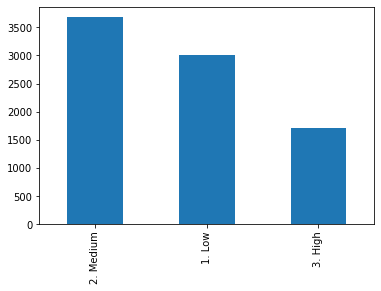

In [302]:
data['deal_complexity'] = np.where(data['y'] <= 1, '1. Low',
                                 np.where(data['y'] <= 7, '2. Medium', '3. High'
                                        ))
data['deal_complexity'].value_counts().plot(kind='bar')

In [391]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

In [305]:
y=data['deal_complexity']
X = data
X.drop(columns=['y','deal_complexity'],inplace=True)

In [306]:
X.columns

Index(['BookingSystemName', 'Assets', 'IsPrimary', 'OpportunityTypeValue',
       'CustomerNumber', 'dealstatusvalue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',
       'ContractRevenue', 'LineItemRevenue', 'year', 'month', 'day'],
      dtype='object')

In [307]:
numeric_features = ['Assets', 'IsPrimary',
       'ContractRevenue', 'LineItemRevenue','year','month','day']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['BookingSystemName', 'OpportunityTypeValue', 'dealstatusvalue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

C:\Users\rmead\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


model score: 0.720


In [308]:
predictions = clf.predict(X_test)

In [309]:
confusion_matrix(y_test, predictions)

array([[496,  97,  13],
       [ 59, 576, 110],
       [ 18, 173, 137]], dtype=int64)

In [368]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomForestClassifier())])

best_model = []

# function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        #rank_test_score is in cv_results_ dict (attribute of GridSearchCV)
        #return non-zero indicies in flattened version
        candidates = np.flatnonzero(results['rank_test_score'] == i) 
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f})".format(results['mean_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            best_model.append(results['params'][candidate])

# specify parameters and distributions to sample from
param_dist = {"classifier__n_estimators": [10,20,30,40,50],
              "classifier__max_depth": [3,5,7,10,20,25],
              "classifier__max_features": randint(20, 50),
              "classifier__min_samples_split": randint(5, 20), 
              "classifier__bootstrap": [True, False],
              "classifier__criterion": ["gini", "entropy"]}

n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)


print("Performing random search...")
print("pipeline:", [name for name, _ in clf.steps])

random_search.fit(X_train, y_train)
print()

#call function defined above
report(random_search.cv_results_)

# BELOW DOESN'T RUN, BUT IS WHAT I'D PREFER / LONG WAY FOLLOWS
# clf.fit(X_train,y_train,**best_model[0])
# ### OR ###
# model_best = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('clf', RandomForestClassifier())],**best_model[0])

model_best = Pipeline(steps=[('preprocessor', preprocessor),
                             ('clf', RandomForestClassifier(
                                     n_estimators=best_model[0]['classifier__n_estimators'],
                                     criterion=best_model[0]['classifier__criterion'],
                                     max_depth=best_model[0]['classifier__max_depth'],
                                     max_features=best_model[0]['classifier__max_features'],
                                     min_samples_split=best_model[0]['classifier__min_samples_split']))])


model_best.fit(X_train,y_train)
y_pred = model_best.predict(X_test)

# Display confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix for Best Model')
print(conf_matrix)



Performing random search...
pipeline: ['preprocessor', 'classifier']
done in 0.000s

Model with rank: 1
Mean validation score: 0.731)
Parameters: {'classifier__bootstrap': False, 'classifier__criterion': 'gini', 'classifier__max_depth': 25, 'classifier__max_features': 44, 'classifier__min_samples_split': 19, 'classifier__n_estimators': 50}

Model with rank: 2
Mean validation score: 0.731)
Parameters: {'classifier__bootstrap': False, 'classifier__criterion': 'gini', 'classifier__max_depth': 25, 'classifier__max_features': 35, 'classifier__min_samples_split': 11, 'classifier__n_estimators': 50}

Model with rank: 3
Mean validation score: 0.731)
Parameters: {'classifier__bootstrap': True, 'classifier__criterion': 'entropy', 'classifier__max_depth': 25, 'classifier__max_features': 41, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Confusion Matrix for Best Model
[[483 113  10]
 [ 30 652  63]
 [  8 204 116]]


In [388]:
#Try a couple of MLPs

warnings.simplefilter('ignore')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',MLPClassifier(max_iter=500, momentum=0.95))])


# specify parameters and distributions to sample from
param_dist = {"classifier__hidden_layer_sizes": [(100),(256)],
              "classifier__solver": ['sgd','adam'],
              "classifier__activation": ['logistic','tanh','relu']}

n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, iid=False)


print("Performing random search...")
print("pipeline:", [name for name, _ in clf.steps])

random_search.fit(X_train, y_train)
print()

#call function defined above
report(random_search.cv_results_)

# BELOW DOESN'T RUN, BUT IS WHAT I'D PREFER / LONG WAY FOLLOWS
# clf.fit(X_train,y_train,**best_model[0])
# ### OR ###
# model_best = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('clf', RandomForestClassifier())],**best_model[0])

model_best = Pipeline(steps=[('preprocessor', preprocessor),
                             ('clf', MLPClassifier(
                                     max_iter = 500,
                                     momentum=0.95,
                                     hidden_layer_sizes=best_model[3]['classifier__hidden_layer_sizes'],
                                     solver=best_model[3]['classifier__solver'],
                                     activation=best_model[3]['classifier__activation']))])


model_best.fit(X_train,y_train)
y_pred = model_best.predict(X_test)

# Display confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix for Best Model')
print(conf_matrix)


Performing random search...
pipeline: ['preprocessor', 'classifier']

Model with rank: 1
Mean validation score: 0.702)
Parameters: {'classifier__solver': 'sgd', 'classifier__hidden_layer_sizes': 100, 'classifier__activation': 'tanh'}

Model with rank: 2
Mean validation score: 0.698)
Parameters: {'classifier__solver': 'adam', 'classifier__hidden_layer_sizes': 100, 'classifier__activation': 'tanh'}

Model with rank: 3
Mean validation score: 0.698)
Parameters: {'classifier__solver': 'adam', 'classifier__hidden_layer_sizes': 256, 'classifier__activation': 'relu'}

Confusion Matrix for Best Model
[[470 117  19]
 [ 50 613  82]
 [ 11 182 135]]


In [400]:
models_list = [RandomForestClassifier(
                                     n_estimators=best_model[0]['classifier__n_estimators'],
                                     criterion=best_model[0]['classifier__criterion'],
                                     max_depth=best_model[0]['classifier__max_depth'],
                                     max_features=best_model[0]['classifier__max_features'],
                                     min_samples_split=best_model[0]['classifier__min_samples_split']),
               DecisionTreeClassifier(splitter='best'), 
               LogisticRegression(),
               MLPClassifier(
                                     max_iter = 500,
                                     momentum=0.95,
                                     hidden_layer_sizes=best_model[3]['classifier__hidden_layer_sizes'],
                                     solver=best_model[3]['classifier__solver'],
                                     activation=best_model[3]['classifier__activation'])]

names = ['RandomForest','Decision Tree','Logistic','MLP']


for classifier in models_list:
            model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', classifier)])
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
           
            
            conf_matrix = confusion_matrix(y_test, y_pred)
            print(names[models_list.index(classifier)])
            print('Confusion Matrix:')
            print(conf_matrix)
            print('Score:')
            print(round(model.score(X_test, y_test),4))
            print()


RandomForest
Confusion Matrix:
[[474 120  12]
 [ 31 660  54]
 [  8 204 116]]
Score:
0.7445

Decision Tree
Confusion Matrix:
[[502  71  33]
 [ 68 519 158]
 [ 24 145 159]]
Score:
0.7028

Logistic
Confusion Matrix:
[[452 138  16]
 [ 36 640  69]
 [ 13 204 111]]
Score:
0.7165

MLP
Confusion Matrix:
[[466 122  18]
 [ 50 618  77]
 [ 11 185 132]]
Score:
0.7242

